In [1]:
from astropy.table import Table
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
#matplotlib inline
sns.set_color_codes()

In [3]:
nom_reg='Lag'


In [8]:
damiani_tab1_file = "J_A+A_604_A135_table2.dat.fits"
tab = Table.read(damiani_tab1_file)
tab
df = tab.to_pandas()
df.describe()

,RAdeg,DEdeg,RVHalpha,sigHalpha,NormHalpha,RV[NII]6584,sig[NII]6584,Norm[NII]6584,RV[SII]6717,sig[SII]6717,Norm[SII]6717,RV[SII]6731,sig[SII]6731,Norm[SII]6731
count,1177.000000,1177.000000,1177.000000,1177.000000,1177.000000,1177.000000,1177.000000,1177.000000,1177.000000,1177.000000,1177.000000,1177.000000,1177.000000,1177.000000
mean,271.110700,-24.332642,-6.258445,13.711606,56980.737850,-3.934894,11.655811,10499.992090,-3.204393,11.567137,2044.263891,-2.989252,11.512982,1639.080833
std,0.164268,0.105422,2.742485,1.677870,56029.717118,3.240030,1.140301,10622.170782,3.345863,1.205795,1687.371379,3.328345,1.229661,1718.881796
min,270.544500,-24.566860,-13.550000,11.890000,1612.260000,-11.440000,3.990000,651.350000,-12.450000,3.590000,217.730000,-12.480000,8.960000,163.940000
25%,271.010500,-24.406500,-8.460000,13.160000,24079.470000,-5.950000,10.870000,5686.930000,-5.440000,10.730000,1197.130000,-5.260000,10.620000,889.610000
50%,271.110600,-24.344670,-6.370000,13.550000,41640.680000,-3.950000,11.530000,8211.000000,-3.190000,11.450000,1622.020000,-2.980000,11.380000,1223.920000
75%,271.211600,-24.256500,-4.450000,14.030000,69764.840000,-1.900000,12.310000,11584.220000,-1.180000,12.250000,2273.270000,-0.960000,12.230000,1750.890000
max,271.606600,-24.054330,2.840000,64.590000,589418.530000,8.010000,18.520000,125752.930000,10.100000,17.240000,17676.600000,10.120000,17.550000,20417.110000


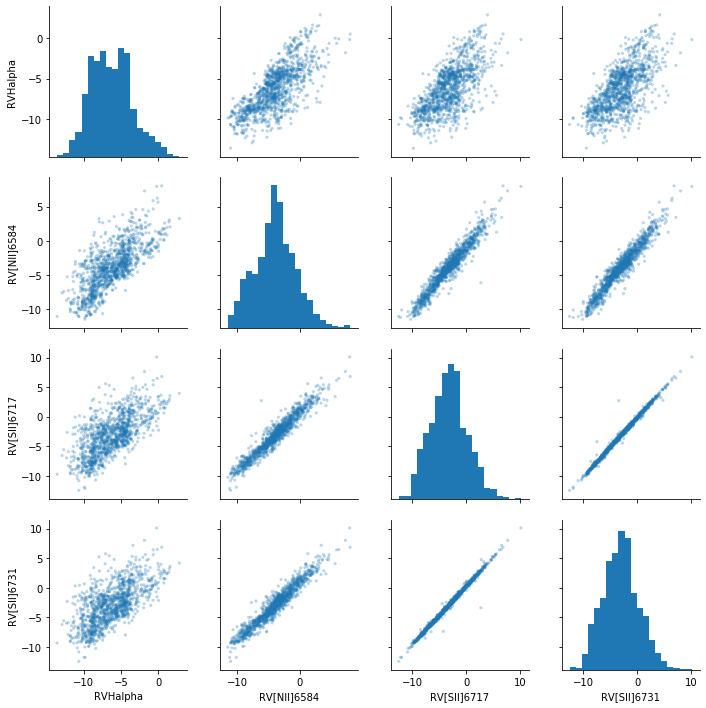

In [5]:
sns.pairplot(df,
             vars=["RVHalpha", "RV[NII]6584", "RV[SII]6717", "RV[SII]6731"],
             diag_kind='hist',
             plot_kws=dict(alpha=0.3, s=10, edgecolor='none'),
             diag_kws=dict(bins=20),
            )


In [10]:
m=df['sigHalpha'] < df['sigHalpha'].mean()+4*df['sigHalpha'].std()


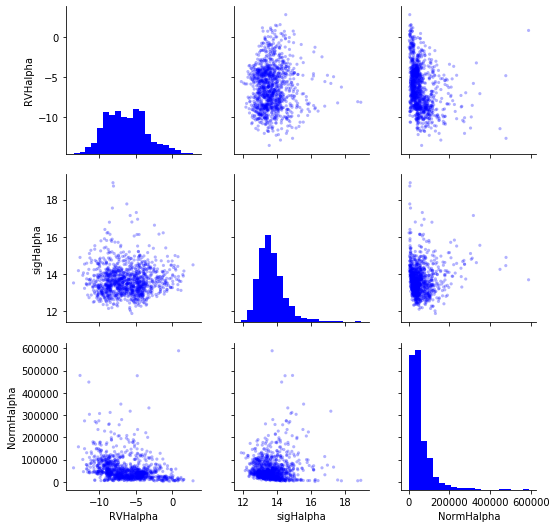

In [11]:
sns.pairplot(df[m],
             vars=["RVHalpha", "sigHalpha", "NormHalpha"],
             diag_kind='hist',
             plot_kws=dict(alpha=0.3, s=10, edgecolor='none', color="blue"),
             diag_kws=dict(bins=20, color="blue"),
            )

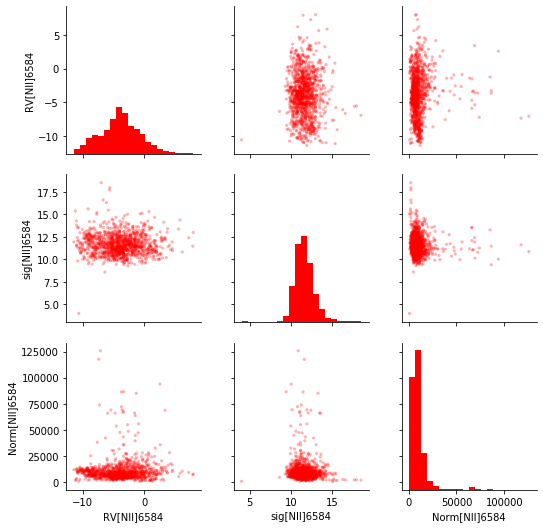

In [7]:
sns.pairplot(df,
             vars=["RV[NII]6584", "sig[NII]6584", "Norm[NII]6584"],
             diag_kind='hist',
             plot_kws=dict(alpha=0.3, s=10, edgecolor='none', color="red"),
             diag_kws=dict(bins=20, color="red"),
            )

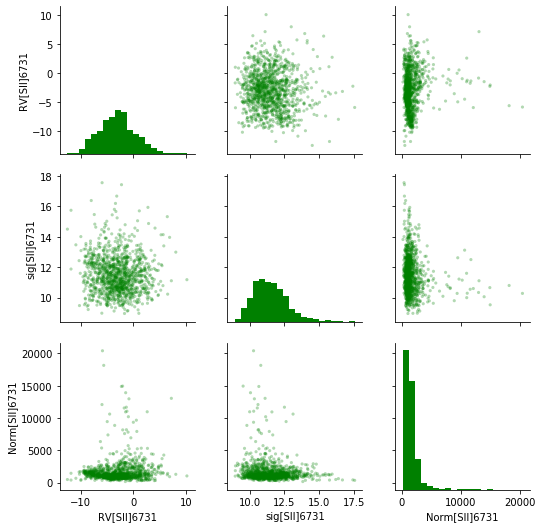

In [9]:
sns.pairplot(df,
             vars=["RV[SII]6731", "sig[SII]6731", "Norm[SII]6731"],
             diag_kind='hist',
             plot_kws=dict(alpha=0.3, s=10, edgecolor='none', color="green"),
             diag_kws=dict(bins=20, color="green"),
            )

In [15]:
df1 = pd.DataFrame(
    {'RA': df.RAdeg, 'DE': df.DEdeg, 'V': df.RVHalpha, '_key': 1}
)


df1.describe()



,RA,DE,V,_key
count,1177.000000,1177.000000,1177.000000,1177.0
mean,271.110700,-24.332642,-6.258445,1.0
std,0.164268,0.105422,2.742485,0.0
min,270.544500,-24.566860,-13.550000,1.0
25%,271.010500,-24.406500,-8.460000,1.0
50%,271.110600,-24.344670,-6.370000,1.0
75%,271.211600,-24.256500,-4.450000,1.0
max,271.606600,-24.054330,2.840000,1.0


In [16]:
df2 = df1.copy()

In [18]:
pairs = pd.merge(df1, df2, on='_key', suffixes=('', '_')).drop('_key', 1)
pairs.index = pd.MultiIndex.from_product((df1.index, df2.index))

pairs.head()

RA        DE     V       RA_       DE_    V_
0 0  271.0562 -24.10769 -4.44  271.0562 -24.10769 -4.44
  1  271.0562 -24.10769 -4.44  271.0348 -24.18544 -8.67
  2  271.0562 -24.10769 -4.44  271.0433 -24.22119 -2.41
  3  271.0562 -24.10769 -4.44  271.1592 -24.23067 -7.78
  4  271.0562 -24.10769 -4.44  271.1480 -24.11269 -5.75

In [19]:
pairs.loc[:, 'dDE'] = 3600*(pairs.DE - pairs.DE_)
pairs.loc[:, 'dRA'] = 3600*(pairs.RA - pairs.RA_)*np.cos(np.radians(0.5*(pairs.DE + pairs.DE_)))
pairs.loc[:, 's'] = np.hypot(pairs.dRA, pairs.dDE)
pairs.loc[:, 'log_s'] = np.log10(pairs.s)
pairs.loc[:, 'dV'] = pairs.V - pairs.V_
pairs.loc[:, 'dV2'] = pairs.dV**2
pairs.loc[:, 'log_dV2'] = np.log10(pairs.dV**2)
pairs.loc[:, 'VV_mean'] = 0.5*(pairs.V + pairs.V_)

/home/zalenovo/my_project_dir/my_project_env/lib/python3.6/site-packages/pandas/core/series.py:853: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [20]:

pairs = pairs[(pairs.dDE > 0.0) & (pairs.dRA > 0.0)]

pairs.head()

pairs.describe()

pairs.corr()

,RA,DE,V,RA_,DE_,V_,dDE,dRA,s,log_s,dV,dV2,log_dV2,VV_mean
RA,1.000000,0.174242,0.639879,0.427712,0.075379,0.106573,0.107379,0.586876,0.527546,0.467031,0.417818,0.351662,0.230439,0.510038
DE,0.174242,1.000000,0.193435,0.024728,0.481016,0.061558,0.570938,0.147525,0.403255,0.399793,0.104907,0.069812,0.075589,0.173223
V,0.639879,0.193435,1.000000,0.212428,0.071769,0.116552,0.130364,0.430437,0.429519,0.360672,0.689430,0.510619,0.356139,0.764641
RA_,0.427712,0.024728,0.212428,1.000000,-0.025089,0.135455,0.048751,-0.480865,-0.388696,-0.317500,0.065721,-0.045820,-0.045418,0.234259
DE_,0.075379,0.481016,0.071769,-0.025089,1.000000,0.055595,-0.445144,0.096276,-0.123775,-0.150053,0.015033,0.009843,0.018202,0.085524
V_,0.106573,0.061558,0.116552,0.135455,0.055595,1.000000,0.010812,-0.017949,-0.005442,-0.004916,-0.639062,-0.259967,-0.171255,0.729184
dDE,0.107379,0.570938,0.130364,0.048751,-0.445144,0.010812,1.000000,0.060522,0.527786,0.548859,0.093073,0.062088,0.060161,0.096838
dRA,0.586876,0.147525,0.430437,-0.480865,0.096276,-0.017949,0.060522,1.000000,0.859923,0.737402,0.346435,0.382141,0.264213,0.284931
s,0.527546,0.403255,0.429519,-0.388696,-0.123775,-0.005442,0.527786,0.859923,1.000000,0.906709,0.336603,0.351679,0.249770,0.292413
log_s,0.467031,0.399793,0.360672,-0.317500,-0.150053,-0.004916,0.548859,0.737402,0.906709,1.000000,0.282902,0.294854,0.254134,0.245318


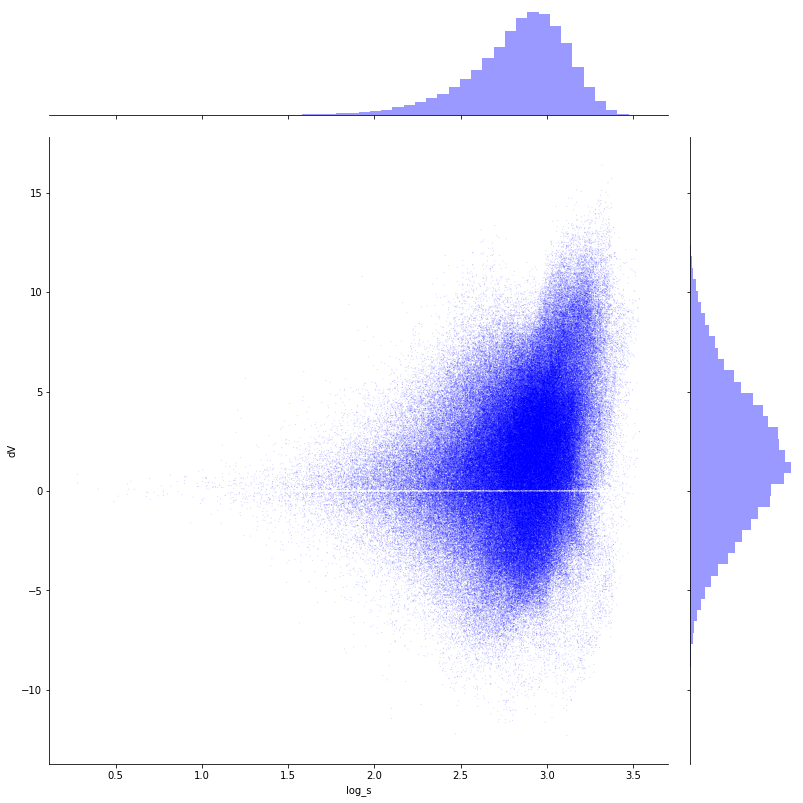

In [33]:

mask = (pairs.log_s > 0.0) & (pairs.log_dV2 > -3)
ax = sns.jointplot(x='log_s', y='dV', data=pairs[mask], alpha=0.2, s=1, edgecolor='none',color="blue")

ax.fig.set_size_inches(12, 12)

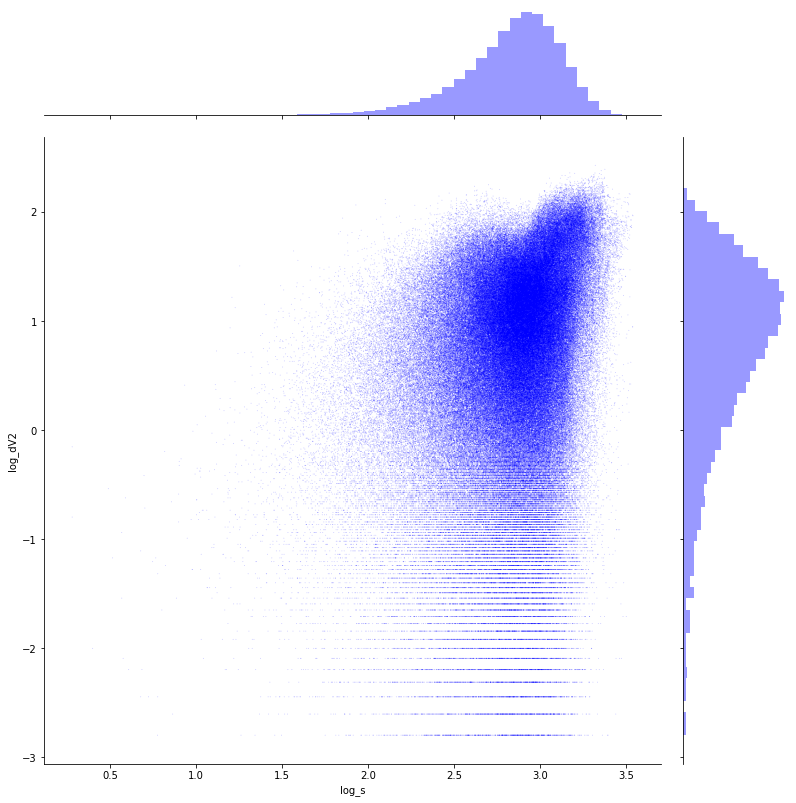

In [34]:
mask = (pairs.log_s > 0.0) & (pairs.log_dV2 > -3)
ax = sns.jointplot(x='log_s', y='log_dV2', data=pairs[mask], alpha=0.2, s=1, edgecolor='none',color="blue")
ax.fig.set_size_inches(12, 12)

In [24]:
pairs.loc[:, 's_class'] = pd.Categorical((2*pairs.log_s + 0.5).astype('int'), ordered=True)

In [25]:
pairs.s_class[pairs.s_class == 0] = 1

In [26]:

for j in range(7):
    print()
    print("s_class =", j)
    print(pairs[pairs.s_class == j][['dV2', 'log_s']].describe())


s_class = 0
       dV2  log_s
count  0.0    0.0
mean   NaN    NaN
std    NaN    NaN
min    NaN    NaN
25%    NaN    NaN
50%    NaN    NaN
75%    NaN    NaN
max    NaN    NaN

s_class = 1
             dV2      log_s
count  17.000000  17.000000
mean    0.139200   0.574487
std     0.185588   0.144444
min     0.003600   0.278866
25%     0.008100   0.513640
50%     0.067600   0.588373
75%     0.193600   0.684262
max     0.705600   0.746366

s_class = 2
              dV2       log_s
count  133.000000  133.000000
mean     0.741796    1.101771
std      2.077859    0.124207
min      0.000000    0.764528
25%      0.048400    1.025487
50%      0.176400    1.137724
75%      0.462400    1.196895
max     16.564900    1.247424

s_class = 3
               dV2        log_s
count  1448.000000  1448.000000
mean      1.861442     1.595528
std       3.759166     0.122404
min       0.000000     1.251207
25%       0.100825     1.515272
50%       0.532900     1.624635
75%       1.883775     1.694547
max     

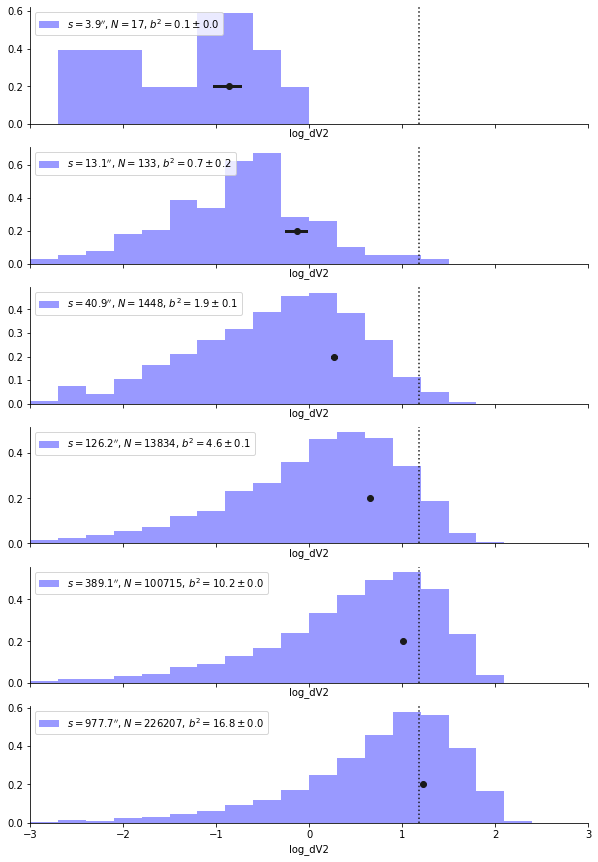

In [35]:
sig2 = pairs.dV2.mean()
sig2a = 2*np.var(df1.V)
fig, axes = plt.subplots(6, 1, figsize=(10, 15), sharex=True)
for sclass, ax in zip(range(1, 7), axes):
    b2mean = np.mean(pairs.dV2[pairs.s_class == sclass])
    b2std = np.std(pairs.dV2[pairs.s_class == sclass])
    b2mean2 = np.mean(pairs.log_dV2[pairs.s_class == sclass])
    n = np.sum(pairs.s_class == sclass)
    b2sem = b2std/np.sqrt(n)
    smean = np.mean(10**pairs.log_s[pairs.s_class == sclass])
    label = f"$s = {smean:.1f}''$"
    label += f", $N = {n}$"
    label += fr", $b^2 = {b2mean:.1f} \pm {b2sem:.1f}$"
    sns.distplot(pairs.log_dV2[pairs.s_class == sclass], 
                 norm_hist=True, kde=False, ax=ax,
                 label=label, bins=20,color="blue", hist_kws=dict(range=[-3.0, 3.0])
                )
    ax.plot([np.log10(b2mean)], [0.2], 'o', color='k')
    ax.plot([np.log10(b2mean - b2sem), np.log10(b2mean + b2sem)], [0.2]*2, lw=3, color='k')
    ax.axvline(np.log10(sig2a), color='k', ls=':')
    ax.set(xlim=[-3.0, 3.0])
    ax.legend(loc='upper left')
sns.despine()

In [28]:
print(f'Dotted line is 2 x sigma^2 = {sig2a:.2f}')

Dotted line is 2 x sigma^2 = 15.03


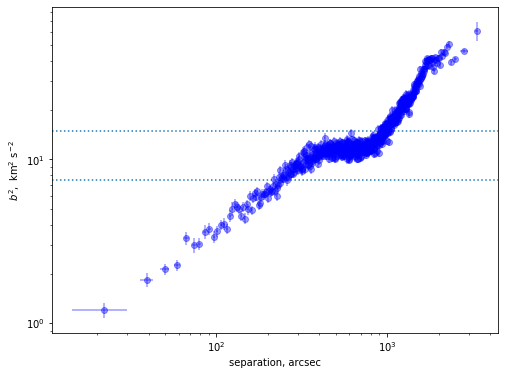

In [36]:
ngroup = 500
groups = np.arange(len(pairs)) // ngroup
table = pairs[['s', 'dV2']].sort_values('s').groupby(groups).describe()
fig, ax = plt.subplots(figsize=(8, 6))
s = table[('s', 'mean')]
e_s = table[('s', 'std')]
b2 = table[('dV2', 'mean')]
ng = table[('dV2', 'count')]
e_b2 = table[('dV2', 'std')]/np.sqrt(ng - 1)
#ax.plot(s, b2, 'o')
ax.axhline(sig2a, ls=':')
ax.axhline(0.5*sig2a, ls=':')
ax.errorbar(s, b2, yerr=e_b2, xerr=e_s, fmt='o', alpha=0.4,color="blue")
ax.set(xscale='log', yscale='log', 
       xlabel='separation, arcsec',
       ylabel=r'$b^2,\ \mathrm{km^2\ s^{-2}}$'
      )
None

In [40]:
df1 = pd.DataFrame(
    {'RA': df.RAdeg, 'DE': df.DEdeg, 'V': df['RV[NII]6584'], '_key': 1}
)


df1.describe()

,RA,DE,V,_key
count,1177.000000,1177.000000,1177.000000,1177.0
mean,271.110700,-24.332642,-3.934894,1.0
std,0.164268,0.105422,3.240030,0.0
min,270.544500,-24.566860,-11.440000,1.0
25%,271.010500,-24.406500,-5.950000,1.0
50%,271.110600,-24.344670,-3.950000,1.0
75%,271.211600,-24.256500,-1.900000,1.0
max,271.606600,-24.054330,8.010000,1.0


In [41]:
df2 = df1.copy()

In [42]:
pairs = pd.merge(df1, df2, on='_key', suffixes=('', '_')).drop('_key', 1)
pairs.index = pd.MultiIndex.from_product((df1.index, df2.index))

pairs.head()

RA        DE     V       RA_       DE_    V_
0 0  271.0562 -24.10769 -3.32  271.0562 -24.10769 -3.32
  1  271.0562 -24.10769 -3.32  271.0348 -24.18544 -5.89
  2  271.0562 -24.10769 -3.32  271.0433 -24.22119  2.03
  3  271.0562 -24.10769 -3.32  271.1592 -24.23067 -4.93
  4  271.0562 -24.10769 -3.32  271.1480 -24.11269 -4.48

In [43]:
pairs.loc[:, 'dDE'] = 3600*(pairs.DE - pairs.DE_)
pairs.loc[:, 'dRA'] = 3600*(pairs.RA - pairs.RA_)*np.cos(np.radians(0.5*(pairs.DE + pairs.DE_)))
pairs.loc[:, 's'] = np.hypot(pairs.dRA, pairs.dDE)
pairs.loc[:, 'log_s'] = np.log10(pairs.s)
pairs.loc[:, 'dV'] = pairs.V - pairs.V_
pairs.loc[:, 'dV2'] = pairs.dV**2
pairs.loc[:, 'log_dV2'] = np.log10(pairs.dV**2)
pairs.loc[:, 'VV_mean'] = 0.5*(pairs.V + pairs.V_)

In [44]:
pairs = pairs[(pairs.dDE > 0.0) & (pairs.dRA > 0.0)]

pairs.head()

pairs.describe()

pairs.corr()

,RA,DE,V,RA_,DE_,V_,dDE,dRA,s,log_s,dV,dV2,log_dV2,VV_mean
RA,1.000000,0.174242,0.292849,0.427712,0.075379,-0.024575,0.107379,0.586876,0.527546,0.467031,0.204633,0.012868,0.020904,0.152813
DE,0.174242,1.000000,0.209344,0.024728,0.481016,0.081609,0.570938,0.147525,0.403255,0.399793,0.064486,-0.053013,-0.023162,0.185411
V,0.292849,0.209344,1.000000,0.051444,0.082582,0.073732,0.136487,0.238066,0.277959,0.237241,0.568747,0.139975,0.104956,0.642897
RA_,0.427712,0.024728,0.051444,1.000000,-0.025089,-0.060214,0.048751,-0.480865,-0.388696,-0.317500,0.082049,-0.101328,-0.086664,-0.016087
DE_,0.075379,0.481016,0.082582,-0.025089,1.000000,0.202133,-0.445144,0.096276,-0.123775,-0.150053,-0.114720,-0.029144,-0.021837,0.203662
V_,-0.024575,0.081609,0.073732,-0.060214,0.202133,1.000000,-0.105932,0.030185,-0.030969,-0.018592,-0.778339,0.007890,-0.047639,0.811270
dDE,0.107379,0.570938,0.136487,0.048751,-0.445144,-0.105932,1.000000,0.060522,0.527786,0.548859,0.173294,-0.026855,-0.003209,-0.001342
dRA,0.586876,0.147525,0.238066,-0.480865,0.096276,0.030185,0.060522,1.000000,0.859923,0.737402,0.124981,0.103211,0.097885,0.162754
s,0.527546,0.403255,0.277959,-0.388696,-0.123775,-0.030969,0.527786,0.859923,1.000000,0.906709,0.200533,0.073467,0.078379,0.139173
log_s,0.467031,0.399793,0.237241,-0.317500,-0.150053,-0.018592,0.548859,0.737402,0.906709,1.000000,0.164691,0.085849,0.106597,0.124808


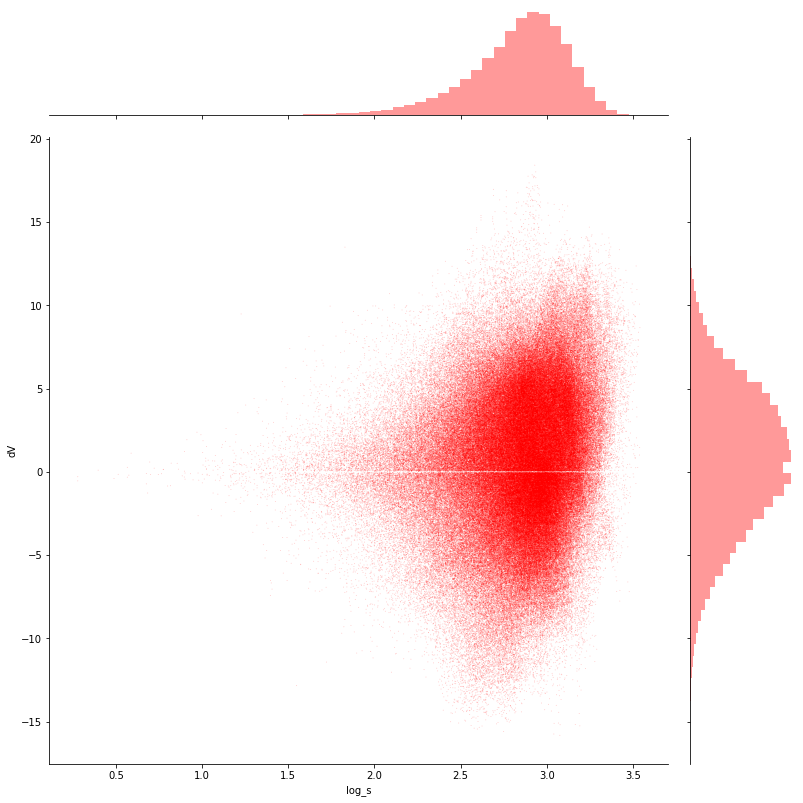

In [45]:

mask = (pairs.log_s > 0.0) & (pairs.log_dV2 > -3)
ax = sns.jointplot(x='log_s', y='dV', data=pairs[mask], alpha=0.2, s=1, edgecolor='none',color="red")
ax.fig.set_size_inches(12, 12)

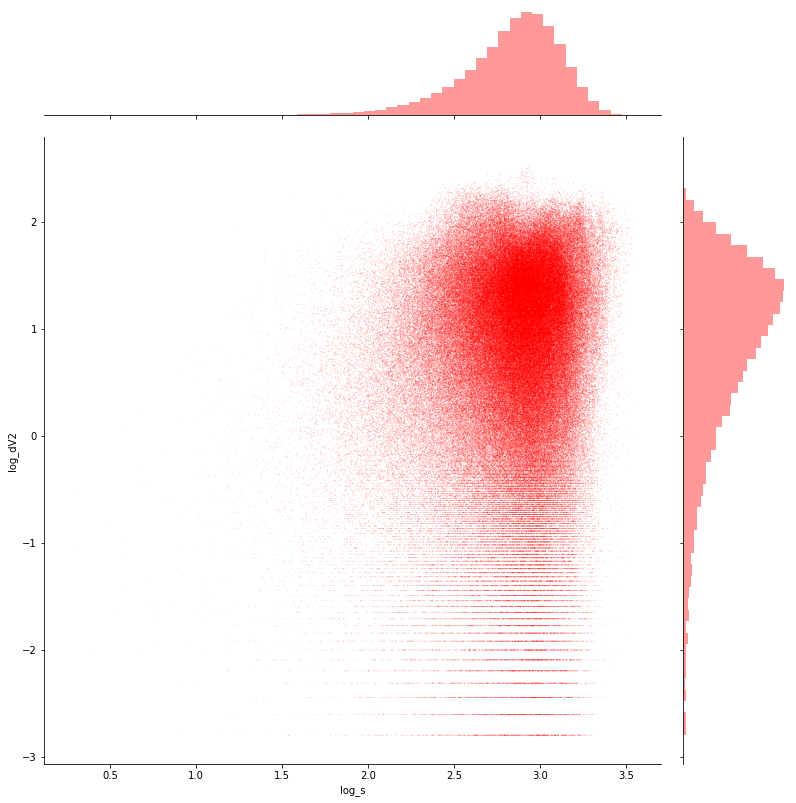

In [46]:
mask = (pairs.log_s > 0.0) & (pairs.log_dV2 > -3)
ax = sns.jointplot(x='log_s', y='log_dV2', data=pairs[mask], alpha=0.2, s=1, edgecolor='none', color="red")
ax.fig.set_size_inches(12, 12)

In [47]:
pairs.loc[:, 's_class'] = pd.Categorical((2*pairs.log_s + 0.5).astype('int'), ordered=True)

In [48]:
pairs.s_class[pairs.s_class == 0] = 1

In [49]:
for j in range(7):
    print()
    print("s_class =", j)
    print(pairs[pairs.s_class == j][['dV2', 'log_s']].describe())


s_class = 0
       dV2  log_s
count  0.0    0.0
mean   NaN    NaN
std    NaN    NaN
min    NaN    NaN
25%    NaN    NaN
50%    NaN    NaN
75%    NaN    NaN
max    NaN    NaN

s_class = 1
             dV2      log_s
count  17.000000  17.000000
mean    0.272176   0.574487
std     0.464016   0.144444
min     0.000100   0.278866
25%     0.025600   0.513640
50%     0.072900   0.588373
75%     0.291600   0.684262
max     1.612900   0.746366

s_class = 2
              dV2       log_s
count  133.000000  133.000000
mean     1.712326    1.101771
std      7.920687    0.124207
min      0.000000    0.764528
25%      0.048400    1.025487
50%      0.270400    1.137724
75%      0.960400    1.196895
max     89.870400    1.247424

s_class = 3
               dV2        log_s
count  1448.000000  1448.000000
mean      4.611252     1.595528
std      10.437718     0.122404
min       0.000000     1.251207
25%       0.168100     1.515272
50%       1.020100     1.624635
75%       4.010025     1.694547
max     

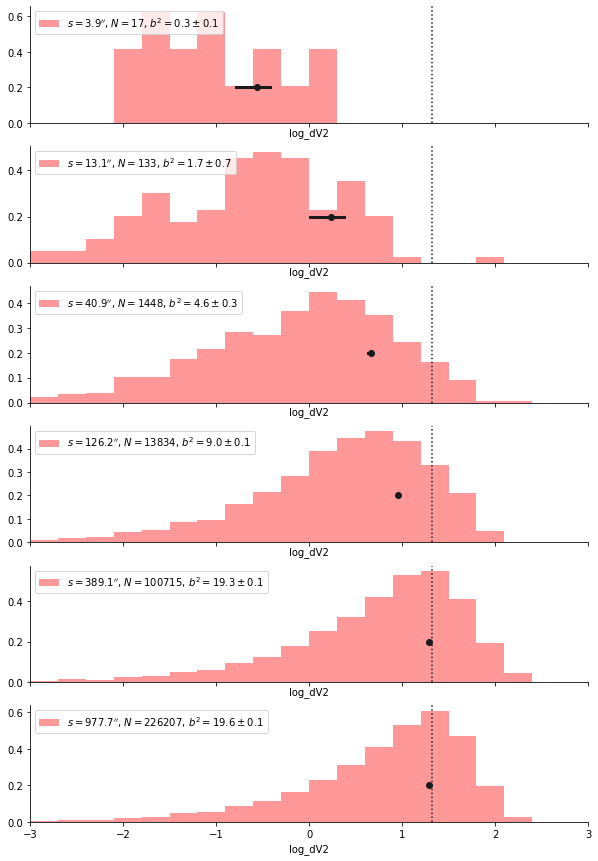

In [50]:
sig2 = pairs.dV2.mean()
sig2a = 2*np.var(df1.V)
fig, axes = plt.subplots(6, 1, figsize=(10, 15), sharex=True)
for sclass, ax in zip(range(1, 7), axes):
    b2mean = np.mean(pairs.dV2[pairs.s_class == sclass])
    b2std = np.std(pairs.dV2[pairs.s_class == sclass])
    b2mean2 = np.mean(pairs.log_dV2[pairs.s_class == sclass])
    n = np.sum(pairs.s_class == sclass)
    b2sem = b2std/np.sqrt(n)
    smean = np.mean(10**pairs.log_s[pairs.s_class == sclass])
    label = f"$s = {smean:.1f}''$"
    label += f", $N = {n}$"
    label += fr", $b^2 = {b2mean:.1f} \pm {b2sem:.1f}$"
    sns.distplot(pairs.log_dV2[pairs.s_class == sclass], 
                 norm_hist=True, kde=False, ax=ax,
                 label=label, bins=20,color="red", hist_kws=dict(range=[-3.0, 3.0])
                )
    ax.plot([np.log10(b2mean)], [0.2], 'o', color='k')
    ax.plot([np.log10(b2mean - b2sem), np.log10(b2mean + b2sem)], [0.2]*2, lw=3, color='k')
    ax.axvline(np.log10(sig2a), color='k', ls=':')
    ax.set(xlim=[-3.0, 3.0])
    ax.legend(loc='upper left')
sns.despine()

In [51]:
print(f'Dotted line is 2 x sigma^2 = {sig2a:.2f}')

Dotted line is 2 x sigma^2 = 20.98


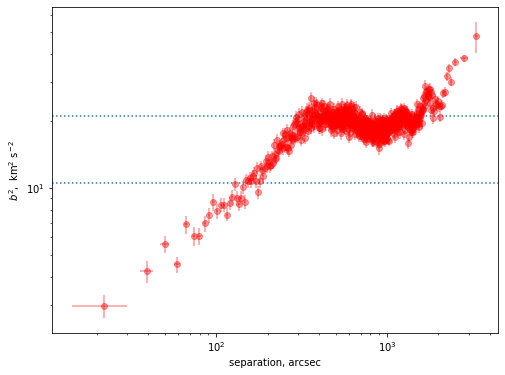

In [53]:
ngroup = 500
groups = np.arange(len(pairs)) // ngroup
table = pairs[['s', 'dV2']].sort_values('s').groupby(groups).describe()
fig, ax = plt.subplots(figsize=(8, 6))
s = table[('s', 'mean')]
e_s = table[('s', 'std')]
b2 = table[('dV2', 'mean')]
ng = table[('dV2', 'count')]
e_b2 = table[('dV2', 'std')]/np.sqrt(ng - 1)
#ax.plot(s, b2, 'o')
ax.axhline(sig2a, ls=':')
ax.axhline(0.5*sig2a, ls=':')
ax.errorbar(s, b2, yerr=e_b2, xerr=e_s, fmt='o', alpha=0.4, color="red")
ax.set(xscale='log', yscale='log', 
       xlabel='separation, arcsec',
       ylabel=r'$b^2,\ \mathrm{km^2\ s^{-2}}$'
      )
None

In [54]:
df1 = pd.DataFrame(
    {'RA': df.RAdeg, 'DE': df.DEdeg, 'V': df['RV[SII]6731'], '_key': 1}
)


df1.describe()

,RA,DE,V,_key
count,1177.000000,1177.000000,1177.000000,1177.0
mean,271.110700,-24.332642,-2.989252,1.0
std,0.164268,0.105422,3.328345,0.0
min,270.544500,-24.566860,-12.480000,1.0
25%,271.010500,-24.406500,-5.260000,1.0
50%,271.110600,-24.344670,-2.980000,1.0
75%,271.211600,-24.256500,-0.960000,1.0
max,271.606600,-24.054330,10.120000,1.0


In [55]:
df2 = df1.copy()

In [56]:
pairs = pd.merge(df1, df2, on='_key', suffixes=('', '_')).drop('_key', 1)
pairs.index = pd.MultiIndex.from_product((df1.index, df2.index))

pairs.head()

RA        DE     V       RA_       DE_    V_
0 0  271.0562 -24.10769 -2.19  271.0562 -24.10769 -2.19
  1  271.0562 -24.10769 -2.19  271.0348 -24.18544 -3.58
  2  271.0562 -24.10769 -2.19  271.0433 -24.22119  2.84
  3  271.0562 -24.10769 -2.19  271.1592 -24.23067 -4.06
  4  271.0562 -24.10769 -2.19  271.1480 -24.11269 -4.14

In [57]:
pairs.loc[:, 'dDE'] = 3600*(pairs.DE - pairs.DE_)
pairs.loc[:, 'dRA'] = 3600*(pairs.RA - pairs.RA_)*np.cos(np.radians(0.5*(pairs.DE + pairs.DE_)))
pairs.loc[:, 's'] = np.hypot(pairs.dRA, pairs.dDE)
pairs.loc[:, 'log_s'] = np.log10(pairs.s)
pairs.loc[:, 'dV'] = pairs.V - pairs.V_
pairs.loc[:, 'dV2'] = pairs.dV**2
pairs.loc[:, 'log_dV2'] = np.log10(pairs.dV**2)
pairs.loc[:, 'VV_mean'] = 0.5*(pairs.V + pairs.V_)

In [58]:
pairs = pairs[(pairs.dDE > 0.0) & (pairs.dRA > 0.0)]

pairs.head()

pairs.describe()

pairs.corr()

,RA,DE,V,RA_,DE_,V_,dDE,dRA,s,log_s,dV,dV2,log_dV2,VV_mean
RA,1.000000,0.174242,0.290836,0.427712,0.075379,-0.038686,0.107379,0.586876,0.527546,0.467031,0.220565,0.037758,0.041874,0.148175
DE,0.174242,1.000000,0.229370,0.024728,0.481016,0.077765,0.570938,0.147525,0.403255,0.399793,0.086880,-0.028136,-0.003496,0.198336
V,0.290836,0.229370,1.000000,0.045518,0.092525,0.067766,0.147630,0.241442,0.285485,0.240606,0.596923,0.152799,0.120455,0.660569
RA_,0.427712,0.024728,0.045518,1.000000,-0.025089,-0.084544,0.048751,-0.480865,-0.388696,-0.317500,0.097636,-0.092059,-0.061106,-0.035872
DE_,0.075379,0.481016,0.092525,-0.025089,1.000000,0.207604,-0.445144,0.096276,-0.123775,-0.150053,-0.106672,-0.006915,-0.005876,0.212622
V_,-0.038686,0.077765,0.067766,-0.084544,0.207604,1.000000,-0.114981,0.038298,-0.028291,-0.016956,-0.760003,0.051184,-0.006718,0.793804
dDE,0.107379,0.570938,0.147630,0.048751,-0.445144,-0.114981,1.000000,0.060522,0.527786,0.548859,0.188631,-0.022262,0.001932,0.003469
dRA,0.586876,0.147525,0.241442,-0.480865,0.096276,0.038298,0.060522,1.000000,0.859923,0.737402,0.126483,0.119081,0.095346,0.175996
s,0.527546,0.403255,0.285485,-0.388696,-0.123775,-0.028291,0.527786,0.859923,1.000000,0.906709,0.208720,0.090883,0.079515,0.152736
log_s,0.467031,0.399793,0.240606,-0.317500,-0.150053,-0.016956,0.548859,0.737402,0.906709,1.000000,0.170370,0.100820,0.108660,0.133908


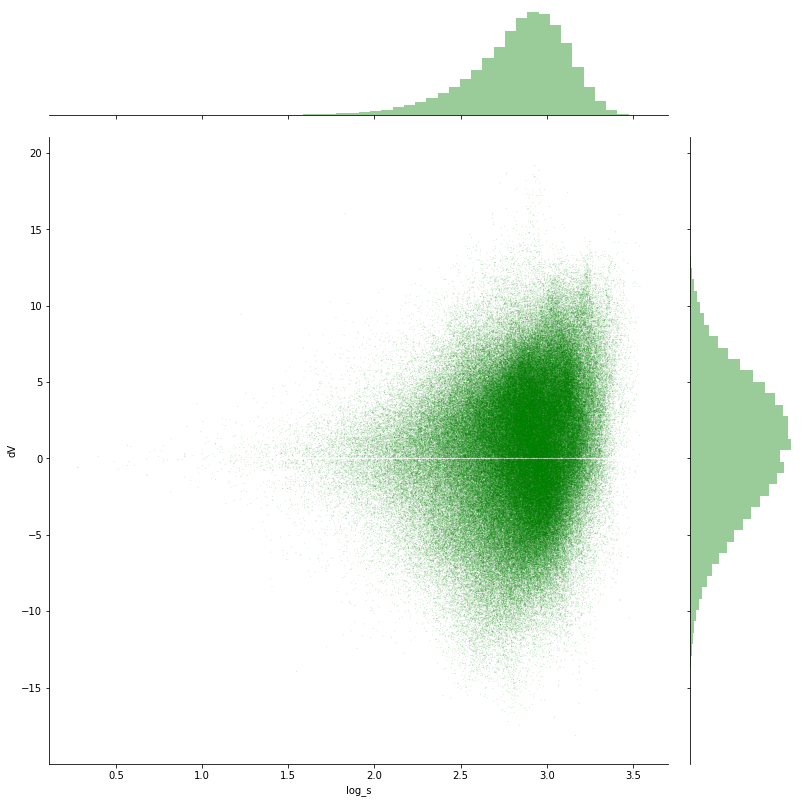

In [59]:

mask = (pairs.log_s > 0.0) & (pairs.log_dV2 > -3)
ax = sns.jointplot(x='log_s', y='dV', data=pairs[mask], alpha=0.2, s=1, edgecolor='none',color="green")
ax.fig.set_size_inches(12, 12)

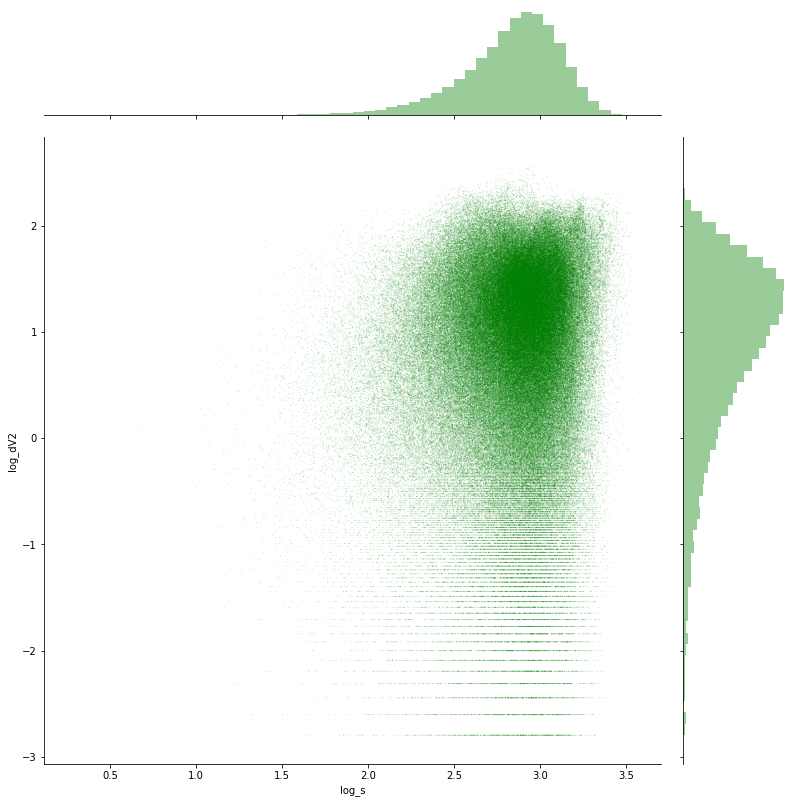

In [60]:
mask = (pairs.log_s > 0.0) & (pairs.log_dV2 > -3)
ax = sns.jointplot(x='log_s', y='log_dV2', data=pairs[mask], alpha=0.2, s=1, edgecolor='none', color="green")
ax.fig.set_size_inches(12, 12)

In [61]:
pairs.loc[:, 's_class'] = pd.Categorical((2*pairs.log_s + 0.5).astype('int'), ordered=True)

In [62]:
pairs.s_class[pairs.s_class == 0] = 1

In [63]:

for j in range(7):
    print()
    print("s_class =", j)
    print(pairs[pairs.s_class == j][['dV2', 'log_s']].describe())


s_class = 0
       dV2  log_s
count  0.0    0.0
mean   NaN    NaN
std    NaN    NaN
min    NaN    NaN
25%    NaN    NaN
50%    NaN    NaN
75%    NaN    NaN
max    NaN    NaN

s_class = 1
             dV2      log_s
count  17.000000  17.000000
mean    0.348776   0.574487
std     0.381759   0.144444
min     0.000100   0.278866
25%     0.044100   0.513640
50%     0.220900   0.588373
75%     0.504100   0.684262
max     1.210000   0.746366

s_class = 2
              dV2       log_s
count  133.000000  133.000000
mean     2.170917    1.101771
std      7.915850    0.124207
min      0.000000    0.764528
25%      0.048400    1.025487
50%      0.518400    1.137724
75%      1.904400    1.196895
max     88.736400    1.247424

s_class = 3
               dV2        log_s
count  1448.000000  1448.000000
mean      5.160422     1.595528
std      11.491438     0.122404
min       0.000000     1.251207
25%       0.230400     1.515272
50%       1.299600     1.624635
75%       4.840000     1.694547
max     

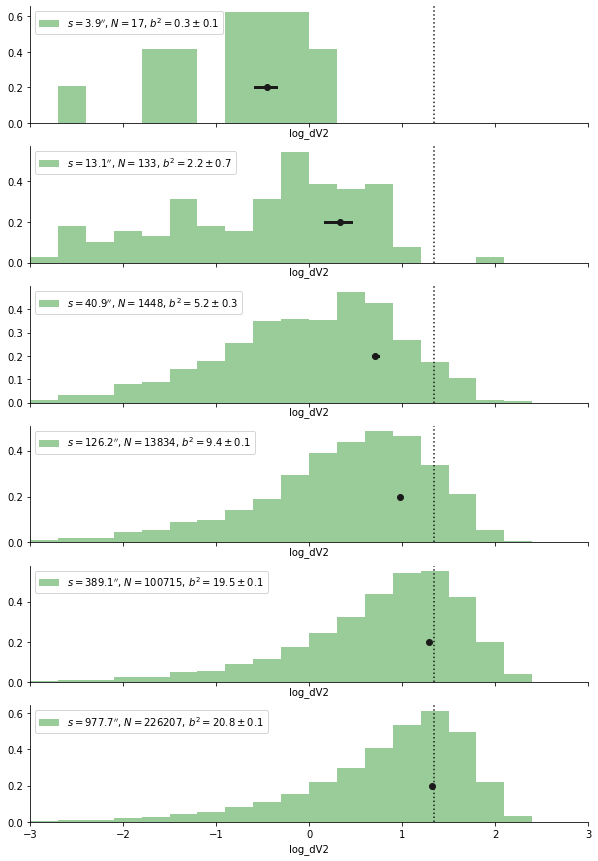

In [64]:
sig2 = pairs.dV2.mean()
sig2a = 2*np.var(df1.V)
fig, axes = plt.subplots(6, 1, figsize=(10, 15), sharex=True)
for sclass, ax in zip(range(1, 7), axes):
    b2mean = np.mean(pairs.dV2[pairs.s_class == sclass])
    b2std = np.std(pairs.dV2[pairs.s_class == sclass])
    b2mean2 = np.mean(pairs.log_dV2[pairs.s_class == sclass])
    n = np.sum(pairs.s_class == sclass)
    b2sem = b2std/np.sqrt(n)
    smean = np.mean(10**pairs.log_s[pairs.s_class == sclass])
    label = f"$s = {smean:.1f}''$"
    label += f", $N = {n}$"
    label += fr", $b^2 = {b2mean:.1f} \pm {b2sem:.1f}$"
    sns.distplot(pairs.log_dV2[pairs.s_class == sclass], 
                 norm_hist=True, kde=False, ax=ax,
                 label=label, bins=20, color="green",hist_kws=dict(range=[-3.0, 3.0])
                )
    ax.plot([np.log10(b2mean)], [0.2], 'o', color='k')
    ax.plot([np.log10(b2mean - b2sem), np.log10(b2mean + b2sem)], [0.2]*2, lw=3, color='k')
    ax.axvline(np.log10(sig2a), color='k', ls=':')
    ax.set(xlim=[-3.0, 3.0])
    ax.legend(loc='upper left')
sns.despine()

In [65]:
print(f'Dotted line is 2 x sigma^2 = {sig2a:.2f}')

Dotted line is 2 x sigma^2 = 22.14


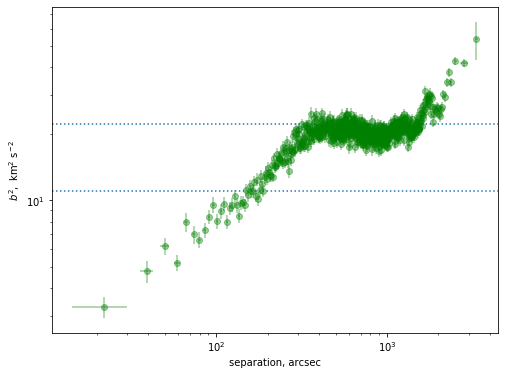

In [66]:
ngroup = 500
groups = np.arange(len(pairs)) // ngroup
table = pairs[['s', 'dV2']].sort_values('s').groupby(groups).describe()
fig, ax = plt.subplots(figsize=(8, 6))
s = table[('s', 'mean')]
e_s = table[('s', 'std')]
b2 = table[('dV2', 'mean')]
ng = table[('dV2', 'count')]
e_b2 = table[('dV2', 'std')]/np.sqrt(ng - 1)
#ax.plot(s, b2, 'o')
ax.axhline(sig2a, ls=':')
ax.axhline(0.5*sig2a, ls=':')
ax.errorbar(s, b2, yerr=e_b2, xerr=e_s, fmt='o', alpha=0.4, color="green")
ax.set(xscale='log', yscale='log', 
       xlabel='separation, arcsec',
       ylabel=r'$b^2,\ \mathrm{km^2\ s^{-2}}$'
      )
None